# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST and train the model for 20 epochs.
By default, the model will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, utils

1. Warmup
* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



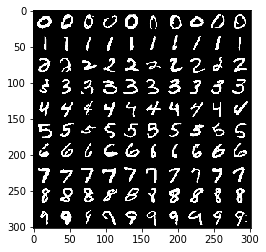

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


ValueError: ignored

In [2]:
import matplotlib.pyplot as plt
import numpy as np

mnist_classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

cifar_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_of_images = 10
all_mnist_images = []
all_cifar_images = []

# mnist_dataloaders = dict.fromkeys(mnist_classes, 0)
# cifar_dataloaders = dict.fromkeys(cifar_classes, 0)

# mnist_images = dict.fromkeys(mnist_classes, 0)
# cifar_images = dict.fromkeys(cifar_classes, 0)

# functions to show an image
def imshow(img):
    # img = img / 2 + 0.5
    img = utils.make_grid(img, nrow = 10)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    plt.show()


# print 10 images from each class of MNIST
mnist_data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
# mnist_trainset = datasets.MNIST(root='.', train=True, download=True, transform=mnist_data_transform)
# mnist_testset = datasets.MNIST(root='.', train=False, download=True, transform=mnist_data_transform)

for i in range(10):
  dataset_local = datasets.MNIST(root='.', train=True, download=True, transform=mnist_data_transform)
  idx = dataset_local.targets == i
  dataset_local.targets = dataset_local.targets[idx]
  dataset_local.data = dataset_local.data[idx]
  train_loader_local = torch.utils.data.DataLoader(dataset_local, batch_size=num_of_images, shuffle=True, num_workers=0)

  # get some random training images
  dataiter = iter(train_loader_local)
  images, labels = dataiter.next()
  for image in images:
    all_mnist_images.append(image)
  # # show images
  # imshow(torchvision.utils.make_grid(images))



# for i in range(10):
#   for image in mnist_images[i]:
#     all_images.append(image)

# imshow(torchvision.utils.make_grid(all_mnist_images))
imshow(all_mnist_images)


# train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True, num_workers=0)
# test_loader  = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=False, num_workers=0)


cifar_data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])


for i in range(10):
  dataset_local2 = datasets.CIFAR10(root='.', train=True, download=True, transform=cifar_data_transform)
  idx = dataset_local2.targets == i
  dataset_local2.targets = dataset_local2.targets[idx]
  dataset_local2.data = dataset_local2.data[idx]
  
  train_loader_local2 = torch.utils.data.DataLoader(dataset_local2, batch_size=num_of_images, shuffle=True, num_workers=0)

  # get some random training images
  dataiter2 = iter(train_loader_local2)
  images2, labels2 = dataiter2.next()
  for image in images2:
    all_cifar_images.append(image)

print(len(all_cifar_images))
# imshow(torchvision.utils.make_grid(all_cifar_images))
imshow(all_cifar_images)




In [3]:
dataset_parent = datasets.CIFAR10(root='.', train=True, download=True, transform=cifar_data_transform)
for i in range(10):
  dataset_local2 = dataset_parent
  print(len(dataset_local2))
  idx = dataset_local2.targets == i
  dataset_local2.targets = dataset_local2.targets[idx]
  dataset_local2.data = dataset_local2.data[idx]
  
  train_loader_local2 = torch.utils.data.DataLoader(dataset_local2, batch_size=num_of_images, shuffle=True, num_workers=0)

  # get some random training images
  dataiter2 = iter(train_loader_local2)
  images2, labels2 = dataiter2.next()
  for image in images2:
    all_cifar_images.append(image)

print(len(all_cifar_images))
# imshow(torchvision.utils.make_grid(all_cifar_images))
imshow(all_cifar_images)


Files already downloaded and verified
50000


ValueError: ignored

2. Training a Single Layer Network on MNIST [10%]

In [4]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01         # learning rate

In [5]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [6]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print ("device ",device)
network = network.to(device)

device  cuda


In [8]:
def train(epoch, network=network, optimizer=optimizer):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(network=network):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)
        output = network(data)
        output = output.to(device)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [9]:
train(1)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.558063
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.690102
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.393666
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.400737
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.373515
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.481156
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.462145
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.406695
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.455842
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.436032


In [11]:
test()


Test set: Average loss: 0.3344, Accuracy: 9048/10000 (90%)



2 a

In [12]:
epochs_2a = 20

for i in range(epochs_2a):
  train(i)

test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.430107
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.371878
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.394007
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.372095
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.258750
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.454657
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.432387
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.203577
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.172445
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.412323
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.310142
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.365873
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.321211
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.289565
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.342765
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.304247
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.444456
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.395986
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.555985
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.204652
Train Epoch:

2 b Plot Images

In [13]:
print(network.linear.weight)

Parameter containing:
tensor([[-0.0161,  0.0112,  0.0280,  ...,  0.0278,  0.0331,  0.0298],
        [ 0.0297,  0.0185,  0.0095,  ...,  0.0191,  0.0073,  0.0374],
        [-0.0178,  0.0101, -0.0264,  ...,  0.0018, -0.0194,  0.0138],
        ...,
        [ 0.0012,  0.0019, -0.0267,  ...,  0.0172,  0.0111, -0.0225],
        [-0.0244,  0.0338,  0.0308,  ...,  0.0123,  0.0145, -0.0291],
        [ 0.0055,  0.0198,  0.0207,  ...,  0.0387,  0.0073, -0.0211]],
       device='cuda:0', requires_grad=True)


In [ ]:
def PlotWeights(weights):
    weights = weights.to("cpu")
    # img = torch.reshape(weights, (28,28))
    # img = torch.reshape(weights, (10,1,28,28)).detach().numpy()
    img = torch.reshape(weights, (10,1,28,28))
    img = utils.make_grid(img, nrow = 10, padding = 10, normalize = True)
    # img = img.to("cpu")
    # npimg = img.detach().numpy()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.show()


PlotWeights(network.linear.weight)

2c Training examples = 50


Test set: Average loss: 0.3354, Accuracy: 9054/10000 (91%)



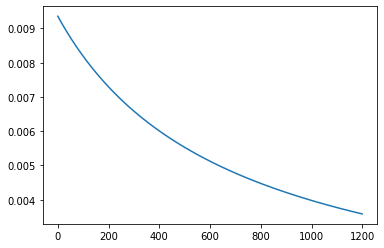

In [19]:
batch_size_2c = 50
epochs_2c = 1200

# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

fiftyexamples = torch.utils.data.Subset(trainset, np.arange(50))
train_loader = torch.utils.data.DataLoader(fiftyexamples, batch_size=batch_size_2c, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size_2c, shuffle=False, num_workers=0)

def train_2c(epoch):
    network.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        logs_loss = []
        # if epoch % 100 == 0 and batch_idx % 100 == 0:
        #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #         epoch, batch_idx * len(data), len(train_loader.dataset),
        #         100. * batch_idx / len(train_loader), loss.item()))
    return epoch_loss

epoch_losses = []

for i in range(epochs_2c):
  epoch_losses.append(train_2c(i))

plt.plot(epoch_losses)

test()

2c) Explanation for the observed behaviour:
Overfitting of the model because the number of large number of epochs and very less number of examples.

3b) Tthe step size is big because of high value of learning rate and the model will not converge.

In [20]:
class Net3a(nn.Module):
      def __init__(self, num_inputs, num_outputs):
        super(Net3a, self).__init__()
        self.linear = nn.Linear(num_inputs, 1000)
        self.hidden = nn.Linear(1000, num_outputs)
        self.nonlinearity = nn.Tanh()


      def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        inp1 = self.linear(input)
        inp1 = self.hidden(inp1)
        output = self.nonlinearity(inp1)
        return output

network_3a = Net3a(num_inputs, num_outputs)
network_3a.to(device)


for i in range(epochs):
  train(i, network=network_3a)

test()

Train Epoch: 0 [0/50 (0%)]	Loss: 2.365349
Train Epoch: 1 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 2 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 3 [0/50 (0%)]	Loss: 2.365349
Train Epoch: 4 [0/50 (0%)]	Loss: 2.365349
Train Epoch: 5 [0/50 (0%)]	Loss: 2.365349
Train Epoch: 6 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 7 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 8 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 9 [0/50 (0%)]	Loss: 2.365348

Test set: Average loss: 0.3354, Accuracy: 9054/10000 (91%)



In [21]:
optimizer_3a = optim.SGD(network_3a.parameters(), lr=10)

for i in range(epochs):
  train(i, network=network_3a, optimizer=optimizer_3a)

test()

Train Epoch: 0 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 1 [0/50 (0%)]	Loss: 2.365349
Train Epoch: 2 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 3 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 4 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 5 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 6 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 7 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 8 [0/50 (0%)]	Loss: 2.365348
Train Epoch: 9 [0/50 (0%)]	Loss: 2.365348

Test set: Average loss: 0.3354, Accuracy: 9054/10000 (91%)



In [24]:
dataset_4 = 'cifar10' # options: 'mnist' | 'cifar10'
batch_size_4 = 64   # input batch size for training
epochs_4 = 20      # number of epochs to train
lr_4 = 0.01  

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_4, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size_4, shuffle=False, num_workers=0)

num_inputs = 3072
num_outputs = 10

class Net4(nn.Module):
      def __init__(self, num_inputs, num_outputs):
        super(Net4, self).__init__()
        #Layer 1
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2)

        #Layer 2
        self.conv2 = nn.Conv2d(16, 128, 5)
        self.pool2 = nn.MaxPool2d(2)

        #Linear Layer
        self.linear1 = nn.Linear(3200, 64)

        #Output Layer
        self.out = nn.Linear(64, 10)

      def forward(self, input):
        x = F.tanh(self.conv1(input))
        x = self.pool1(x)
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)

        x = x.view(-1, 3200)

        x = F.tanh(self.linear1(x))

        x = self.out(x)
        return x

network_4 = Net4(num_inputs, num_outputs)
network_4.to(device)
optimizer_4 = optim.SGD(network_4.parameters(), lr=lr_4)


for i in range(epochs_4):
  train(i, network=network_4, optimizer=optimizer_4)

test(network=network_4)
    

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 0 [0/50000 (0%)]	Loss: 2.312358
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.123997
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.093020
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.071991
Train Epoch: 0 [25600/50000 (51%)]	Loss: 1.979401
Train Epoch: 0 [32000/50000 (64%)]	Loss: 1.702497
Train Epoch: 0 [38400/50000 (77%)]	Loss: 1.780404
Train Epoch: 0 [44800/50000 (90%)]	Loss: 1.829153
Train Epoch: 1 [0/50000 (0%)]	Loss: 1.678055
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.732706
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.778101
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.642149
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.724433
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.437634
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.420050
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.560236
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.592720
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.576255
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1

In [26]:
total_params = 0
for name, parameter in network_4.named_parameters():
          if not parameter.requires_grad: continue
          params = parameter.numel()
          print(name, params)
          total_params+=params
print('Total parameters are: ', total_params)   

conv1.weight 1200
conv1.bias 16
conv2.weight 51200
conv2.bias 128
linear1.weight 204800
linear1.bias 64
out.weight 640
out.bias 10
Total parameters are:  258058
